In [24]:
# AI Driven Precision Agriculture Data Analysis

# Objectives to focus on.
# 1. Load and preprocess the dataset
# 2. Conducting a thorough data inspection to identify the structure ,missing values,wrong data types, wrong formats, duplicates and outliers
# 3. Analyze the data to find patterns and relationships
# 4. Visualize the distribution of numeric variables using histograms.
# 5. Perform an exploratory data analysis by generating descriptive statistics
# 6. Evaluate the model performance using appropriate metrics
# 7. Create a correlation heatmap to examine the relationships between soil and environmental variables. 
# 8. Save the cleaned and processed data for future use

In [25]:
#Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [26]:

#Loading the dataset
df = pd.read_csv('climate_action_data.csv')

#Inspecting the data 
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [27]:
#More inspection of the data
print("Information about the dataset\n:")
df.info()



Information about the dataset
:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [28]:
print("The inspected data types are:")
df.dtypes

The inspected data types are:


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [29]:
# Descriptive statistics
print("Summary statistics:")
df.describe()

Summary statistics:


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [30]:
#Checking the number of rows and columns
print("The shape of the dataset is:",df.shape)

The shape of the dataset is: (913, 10)


In [31]:
#Checking for missing values in each column
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [32]:
# Handling missing values       
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  #Fills NaN values with mode of the column
        
 


   
# Checking again for missing values
print("Missing values after handling:")
print(df.isnull().sum())              

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [33]:
# Handling data in incorrect/wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


#  Handling columns with 'error' values
agric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in agric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())


In [34]:
# Wrong Data Types
variable_cols= ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in variable_cols:
    if col in df.columns:
        
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())
print("Data types after conversion:")   
print(df.dtypes)       

Data types after conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [35]:
#Checking for duplicates
print("Number of duplicate rows are:",df.duplicated().sum())

Number of duplicate rows are: 111


In [36]:
# Removing duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Checking for duplicate dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 802
Number of duplicate dates: 3


(799, 10)

In [37]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

Text(0.5, 1.0, 'Irrigation_Recommended(mm) Distribution')

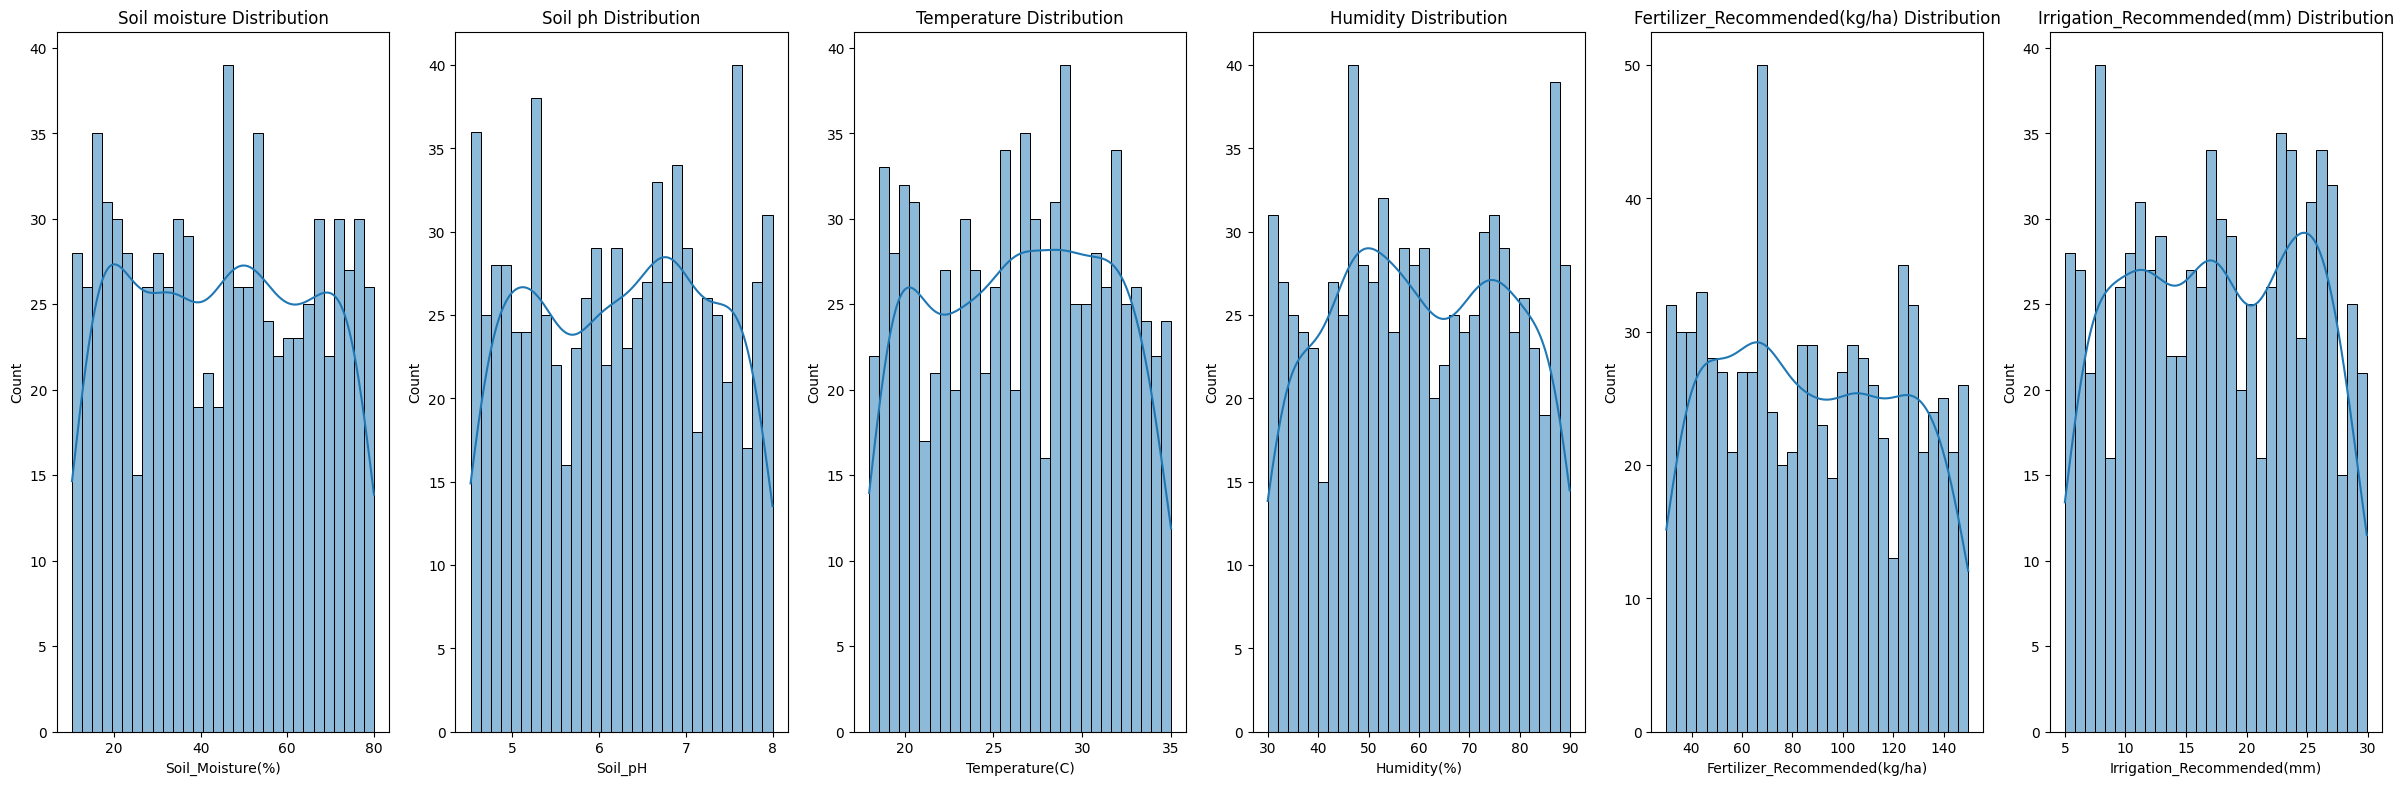

In [38]:
# Histograms showing distribution of numeric values using histograms(visualization)
# Set up the figure size
plt.figure(figsize=(30, 20))

# Histogram of 'Soil moisture'
plt.subplot(2, 6, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title('Soil moisture Distribution')
# Histogram of 'Soil_pH'
plt.subplot(2, 6, 2)
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title('Soil ph Distribution')

# Histogram of 'Temperature'
plt.subplot(2, 6, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title('Temperature Distribution')

# Histogram of 'Humidity'
plt.subplot(2, 6, 4)
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title('Humidity Distribution')

# Histogram of 'Fertilizer_Recommended'
plt.subplot(2, 6, 5)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title('Fertilizer_Recommended(kg/ha) Distribution')

# Histogram of 'Irrigation_Recommended(mm)'
plt.subplot(2, 6, 6)
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title('Irrigation_Recommended(mm) Distribution')




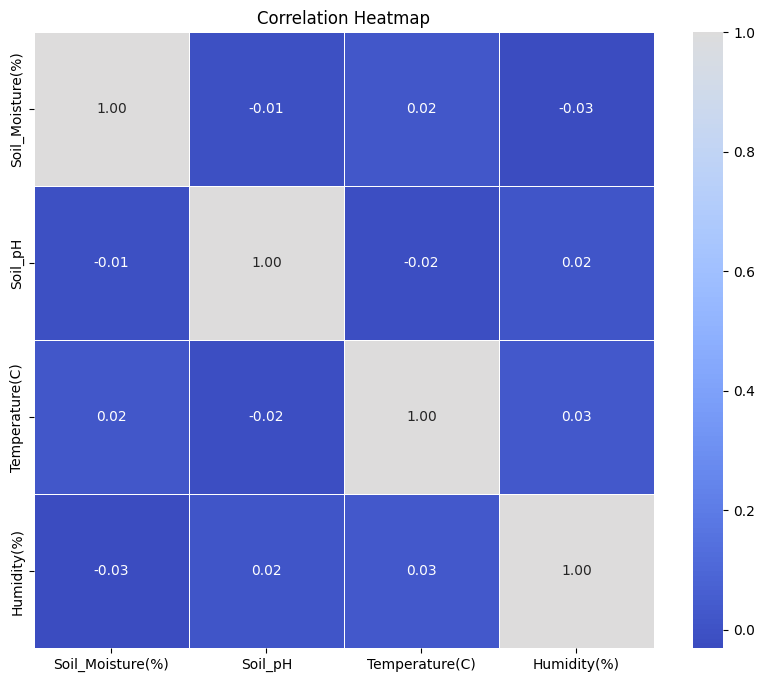

In [39]:

# Correlation Analysis showing relationships between soil and environment variables


cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)']
df_corr = df[cols].apply(pd.to_numeric, errors='coerce')

# Calculating correlation matrix
corr_matrix = df_corr.corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()




In [40]:
#Qtn.Identify what variables mostly influence fertilizer recommendations

#Answer:Date because fertilizer application is often scheduled based on seasonal timing and crop growth stages, which are tied directly to the date.

Crop type with highest average soil moisture: Wheat (47.36%)


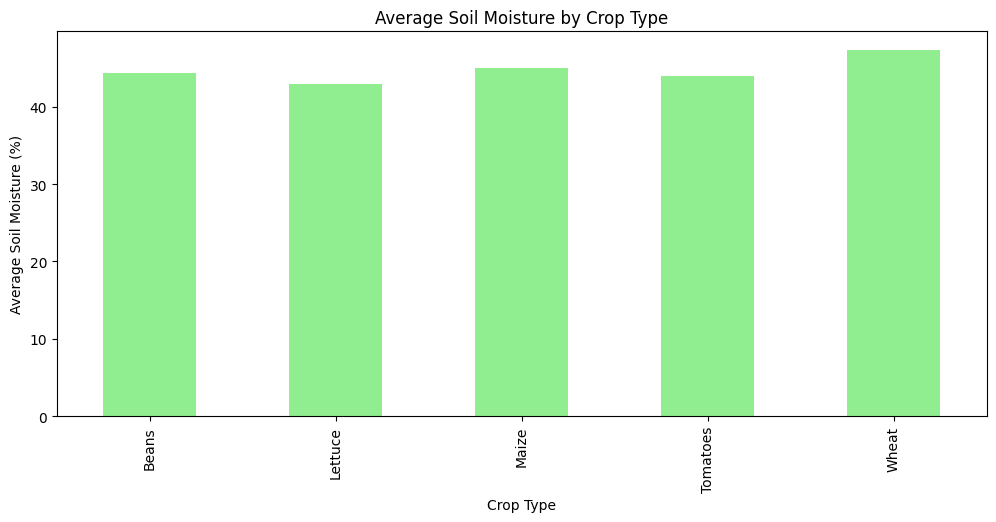

In [41]:
 #Finding the average soil moisture by crop type
average_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()

#Finding the crop type with highest average soil moisture
highest_crop = average_soil_moisture.idxmax()
highest_value = average_soil_moisture.max()
print(f"Crop type with highest average soil moisture: {highest_crop} ({highest_value:.2f}%)")

# Plot  of the average soil moisture by crop type
plt.figure(figsize=(12,5))
average_soil_moisture.plot(kind='bar', color='lightgreen')
plt.title('Average Soil Moisture by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Soil Moisture (%)')
plt.show()

In [42]:
#From analysis,the crop type with the highest average soil moisture is wheat

In [43]:
#Suggestion:Based on the data, none of the crops are experiencing average temperatures above 30°C, indicating that heat stress due to consistently high temperatures is not currently a concern. 

In [44]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)


In [45]:
#Insights and recommendations ased on my analysis
# Key findings
# 1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
# 2. The correlation analysis shows strong relationships between soil and environment variables.
# 3. The cleaned and processed data is ready for further analysis saved as "cleaned_precision_agriculture_data.csv"

#Recommendations
#1.Use sensor data (e.g., soil pH, moisture, temperature) to develop crop-specific fertilizer plans.
#2.Leverage real-time Soil_Moisture(%) data to automate irrigation recommendations.